In [48]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
data = []
labels = []

In [25]:
for file in os.listdir("eyes/maleeyes"):
    file_path = os.path.join("eyes/maleeyes/", file)
    data.append(file_path)
    labels.append("M")
    
for file in os.listdir("eyes/femaleeyes"):
    file_path = os.path.join("eyes/femaleeyes/", file)
    data.append(file_path)
    labels.append("F")    

In [26]:
df = pd.DataFrame({"File": data, "Label": labels})

In [27]:
df = df.sample(frac=1, random_state=4242).reset_index(drop=True)

In [28]:
df.shape

(11525, 2)

In [29]:
df.head()

,File,Label
0,eyes/femaleeyes/2612.jpg,F
1,eyes/maleeyes/2909.jpg,M
2,eyes/femaleeyes/1228.jpg,F
3,eyes/maleeyes/3212.jpg,M
4,eyes/femaleeyes/6339.jpg,F


<AxesSubplot: xlabel='Label', ylabel='count'>

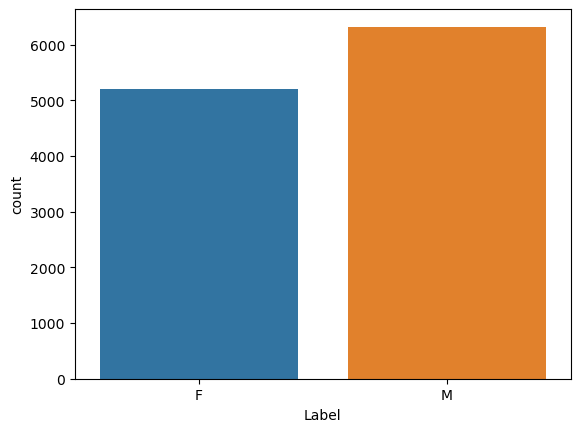

In [30]:
sns.countplot(x="Label", data=df)

In [31]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=4242)

In [32]:
train_df.shape

(8643, 2)

In [33]:
train_df["Label"].value_counts()

Label
M    4759
F    3884
Name: count, dtype: int64

In [34]:
test_df.shape

(2882, 2)

In [35]:
test_df["Label"].value_counts()

Label
M    1564
F    1318
Name: count, dtype: int64

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [41]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
    subset = "training"
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
    subset = "validation"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
)

Found 8643 validated image filenames belonging to 2 classes.
Found 864 validated image filenames belonging to 2 classes.
Found 2882 validated image filenames belonging to 2 classes.


In [53]:
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(75, 75, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(1, activation="softmax")
])

In [54]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

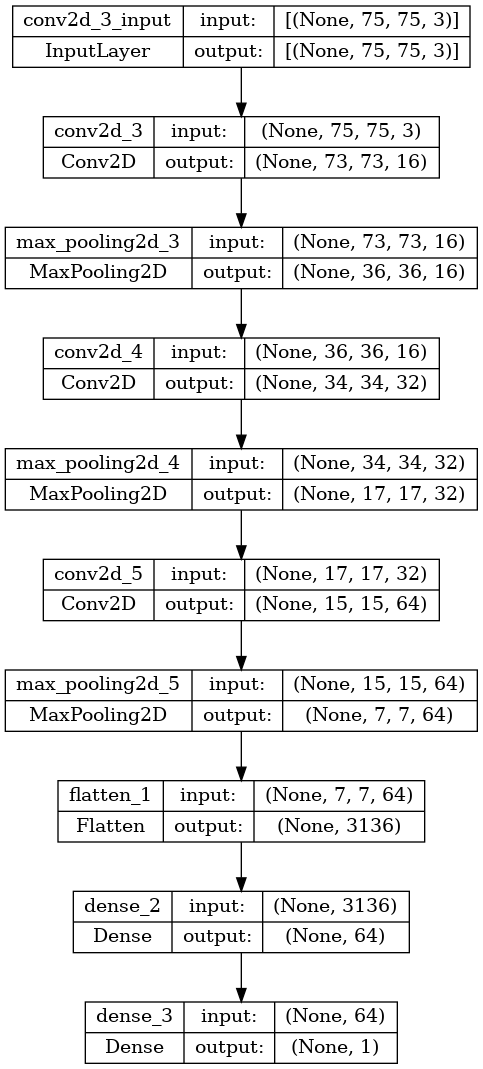

In [55]:
plot_model(model, show_layer_names=True , show_shapes=True)

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 73, 73, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)        

In [57]:
callbacks = [EarlyStopping(monitor='loss', mode='min', patience=15, restore_best_weights=True)]

In [58]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs = 10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=callbacks
)

Epoch 1/10


2023-06-01 22:35:22.342966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


270/270 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.5507

2023-06-01 22:35:39.756811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


270/270 [==============================] - 19s 65ms/step - loss: 0.5009 - accuracy: 0.5507 - val_loss: 0.4364 - val_accuracy: 0.5671
Epoch 2/10
270/270 [==============================] - 17s 61ms/step - loss: 0.3585 - accuracy: 0.5506 - val_loss: 0.3813 - val_accuracy: 0.5671
Epoch 3/10
270/270 [==============================] - 17s 61ms/step - loss: 0.3138 - accuracy: 0.5502 - val_loss: 0.2842 - val_accuracy: 0.5671
Epoch 4/10
270/270 [==============================] - 17s 61ms/step - loss: 0.3083 - accuracy: 0.5505 - val_loss: 0.2643 - val_accuracy: 0.5671
Epoch 5/10
270/270 [==============================] - 17s 62ms/step - loss: 0.2656 - accuracy: 0.5503 - val_loss: 0.2672 - val_accuracy: 0.5671
Epoch 6/10
270/270 [==============================] - 17s 64ms/step - loss: 0.2576 - accuracy: 0.5508 - val_loss: 0.2322 - val_accuracy: 0.5671
Epoch 7/10
270/270 [==============================] - 17s 64ms/step - loss: 0.2355 - accuracy: 0.5509 - val_loss: 0.2408 - val_accuracy: 0.5671
Epo

In [59]:
model.save("eye.h5")

In [60]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.500922,0.550691,0.436425,0.56713
1,0.358494,0.550575,0.381271,0.56713
2,0.313807,0.550226,0.284215,0.56713
3,0.308308,0.550459,0.264309,0.56713
4,0.265635,0.550343,0.267226,0.56713


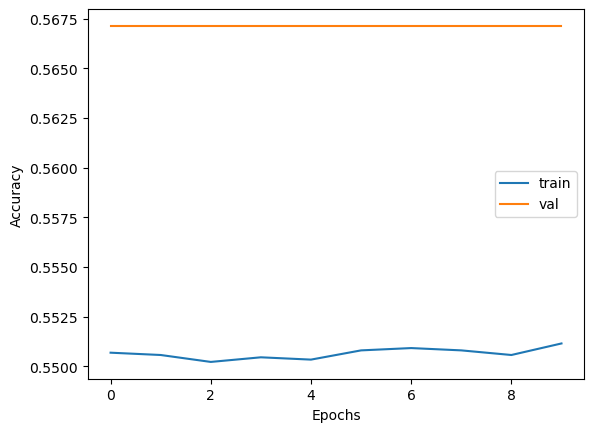

In [61]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

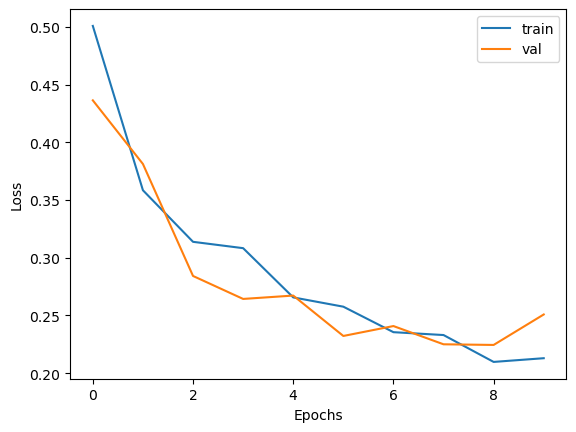

In [62]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [64]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

 7/91 [=>............................] - ETA: 1s - loss: 0.1784 - accuracy: 0.5714

2023-06-01 22:38:42.416665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 2s 18ms/step - loss: 0.2691 - accuracy: 0.5427
Test accuracy: 0.542678713798523
